In [257]:
from __future__ import print_function 
import numpy as np 
import matplotlib.pyplot as plt
np.random.seed(2)

means = [[-1, 0], [1, 0]]
cov = [[.3, .2], [.2, .3]]
N = 10
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)

X = np.concatenate((X0, X1), axis = 0)
y = np.concatenate((np.ones(N), -1*np.ones(N)))

In [258]:
def predict(w, X):  
    '''
    predict label of each row of X, given w 
    X: a 2-d numpy array of shape (N, d), each row is a datapoint 
    w_init: a 1-d numpy array of shape (d)
    '''

    return np.sign(X.dot(w))

def perceptron(X, y, w_init):
    '''
    perform perceptron learning algorithm
    X: a 2-d numpy array of shape (N, d), each row is a datapoint 
    y: a 1-d numpy array of shape (N), label of each row of X. y[i] = 1/-1
    w_init: a 1-d numpy array of shape (d)
    
    '''
    w = w_init
    while True:
        pred = predict(w, X)
        # find indexes of misclassified points
        mis_idxs = np.where(np.equal(pred, y) == False)[0]
        # number of misclassified points
        num_mis = mis_idxs.shape[0]
        if num_mis == 0:
            return w
        # random pick one misclassified point 
        random_id = np.random.choice(mis_idxs, 1)[0]
        # update w 
        w = w + y[random_id]*X[random_id]

np.random.seed(73)
# Xbar 
Xbar = np.concatenate((np.ones((2*N, 1)), X), axis = 1)
w_init = np.random.randn(Xbar.shape[1])
w = perceptron(Xbar, y, w_init)

# print w



In [243]:
def predict(w, X):    
    '''
    predict label of each row of X, given w 
    '''
    return np.sign(X.dot(w))

def viperceptron(X, y, w_init):
    w = w_init
    w_hist = [w]
    mis_points = []
    while True:
        pred = predict(w, X)
        mis_idxs = np.where(np.equal(pred, y) == False)[0]
        num_mis = mis_idxs.shape[0]
        if num_mis == 0:
            return (w_hist, mis_points)
        # random pick one misclassified point 
        random_id = np.random.choice(mis_idxs, 1)[0]
        mis_points.append(random_id)
        w = w + y[random_id]*X[random_id]
        w_hist.append(w)

for i in range(100):
    np.random.seed(i)


    # Xbar 
    Xbar = np.concatenate((np.ones((2*N, 1)), X), axis = 1)
    d = Xbar.shape[1]
    w_init = np.random.randn(d)
    w_hist, m = viperceptron(Xbar, y, w_init)

    print(i, len(w_hist))



0 4
1 2
2 6
3 4
4 5
5 4
6 3
7 6
8 12
9 3
10 5
11 4
12 5
13 6
14 8
15 4
16 8
17 1
18 9
19 3
20 6
21 3
22 1
23 6
24 2
25 9
26 1
27 2
28 7
29 4
30 7
31 4
32 10
33 4
34 5
35 5
36 7
37 3
38 4
39 4
40 4
41 5
42 3
43 5
44 4
45 6
46 7
47 4
48 5
49 4
50 3
51 3
52 1
53 8
54 3
55 7
56 4
57 5
58 4
59 9
60 4
61 3
62 4
63 10
64 1
65 9
66 2
67 4
68 6
69 2
70 5
71 4
72 8
73 7
74 5
75 2
76 5
77 5
78 5
79 4
80 3
81 5
82 2
83 2
84 4
85 5
86 4
87 5
88 8
89 3
90 8
91 4
92 3
93 8
94 5
95 4
96 5
97 3
98 3
99 8


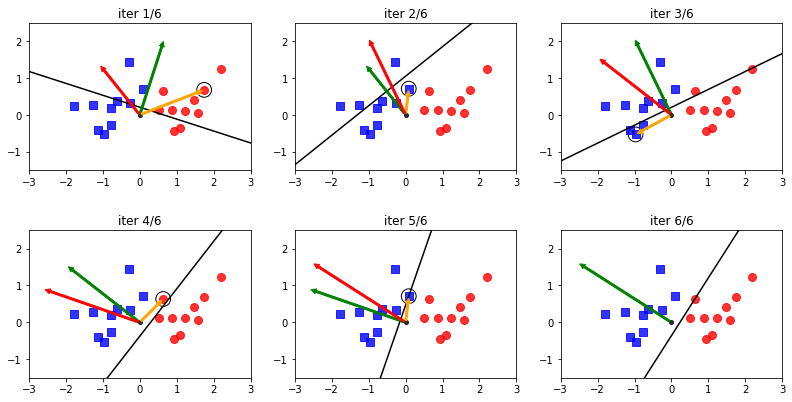

In [256]:

from matplotlib.backends.backend_pdf import PdfPages

i = 73
np.random.seed(i)
Xbar = np.concatenate((np.ones((2*N, 1)), X), axis = 1)
d = Xbar.shape[1]
w_init = np.random.randn(d)
w_hist, m = viperceptron(Xbar, y, w_init)
# print i, len(w_hist)
    
    
def draw_line(plt, w):
    w0, w1, w2 = w[0], w[1], w[2]
    if w2 != 0:
        x11, x12 = -100, 100
        return plt.plot([x11, x12], [-(w1*x11 + w0)/w2, -(w1*x12 + w0)/w2], 'k')
    else:
        x10 = -w0/w1
        return plt.plot([x10, x10], [-100, 100], 'k')

nrows = 2 
ncols = 3
width = 4.5*ncols 
height = 3.5*nrows

filename = 'pla_visualize1.pdf'
with PdfPages(filename) as pdf: 
    plt.close('all')
    fig,axs=plt.subplots(nrows,ncols,figsize=(width,height)) 
    ids = range(7)

    for i, k in enumerate(ids[1:]):
        r = i//ncols 
        c = i%ncols 
        str0 = 'iter {}/{}'.format(i+1, len(ids)-1)
#         if nrows > 1:
        axs[r, c].set_title(str0)
        axs[r, c].plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = .8)
        axs[r, c].plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = .8)
        axs[r, c].plot(0, 0, 'k.', markersize = 8, alpha = .8)
        axs[r, c].axis([0 , 6, -2, 4])
        draw_line(axs[r, c], w_hist[k])
        wx, wy = w_hist[k][1], w_hist[k][2]
        axs[r, c].annotate('', xy=(wx, wy), xytext=(0, 0),
                        arrowprops=dict(arrowstyle="simple", connectionstyle="arc3", ec = 'green', fc = 'green'))
        if k < nrows*ncols:
            xmis = X[m[k], 0]
            ymis = X[m[k], 1]
#                 circle around the misclassified point
            circle = plt.Circle((xmis, ymis), 0.2, color='k', fill = False)
            axs[r, c].add_artist(circle)
#                 vector to xmis
            axs[r, c].annotate('', xy=(xmis, ymis), xytext=(0, 0),
                        arrowprops=dict(arrowstyle="simple", connectionstyle="arc3", ec = 'orange', fc = 'orange'))

            if m[k] > 10:
#                 New w if the misclassified point is in red 
                axs[r, c].annotate('', xytext=(0, 0), xy=(wx - xmis, wy-ymis),
                        arrowprops=dict(arrowstyle="simple", connectionstyle="arc3", ec = 'red', fc = 'red'))
#                     axs[r, c].annotate('local max', xy=(2, 1), xytext=(3, 1.5),
#                         arrowprops=dict(facecolor='black', shrink=0.01, ''),
#                             )
            else: # the misclassified point is in blue
                axs[r, c].annotate('', xytext=(0, 0), xy=(wx + xmis, wy+ymis),
                        arrowprops=dict(arrowstyle="simple", connectionstyle="arc3", ec = 'red', fc = 'red'))




        axs[r, c].axis('scaled')
        axs[r, c].axis([-3, 3, -1.5, 2.5])
    pdf.savefig(bbox_inches = 'tight')
    plt.show()